## SME0130 - Redes Complexas

Structure of networks: Degree and Trasitivity

Professor: Francisco Aparecido Rodrigues, francisco@icmc.usp.br. <br>
Estudante: Bruno F. Bessa (num. 5881890) <br>
Universidade de São Paulo, São Carlos, Brasil.

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

In [4]:
def get_graph_from_data_file(file_name='lesmis.txt', ncols=3):
    
    '''
    Defines a NetworkX graph based on data from file. 
    Plots a visual representation of the graph 
    '''
    
    file_path = 'data/' + file_name
    
    if ncols == 2:
        G = nx.read_edgelist("data/powergrid.txt", nodetype=int)
    else:
        G = nx.read_edgelist(file_path, nodetype=int, data=(('weight', float),))
        
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color='b', node_size=50, with_labels=False)
    
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    
    return G

In [19]:
def get_graph_data(G):
    print('Number of edges: {}. Number of nodes: {}.'.format(len(G), G.number_of_nodes()))
    vk = list(dict(G.degree()).values())
    vk = np.array(vk)
    print('Graph\'s mean degree: {}'.format(np.mean(vk)))

def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

def momment_of_degree_distribution2(G,m):
    'Moment of order m'
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

def normalized_shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H/math.log(len(G),2)

# Transitivity and Clustering
def get_transitivity_data(G):
    CC = (nx.transitivity(G)) 

    avc = nx.average_clustering(G)
    vcc = []
    for i in G.nodes():
        vcc.append(nx.clustering(G, i))
    vcc= np.array(vcc)

    return [CC, avc]

def complexity_coefficient(G):
    return momment_of_degree_distribution(G, 2)/momment_of_degree_distribution(G,1)

## Questions

<b>1 - Para a bases lesmis, calcule o terceiro e quarto momentos da distribuição do grau</b>

Para a solução, usaremos o conhecimento de que o momento de ordem n de uma medida é:
$$
E[x^n] = \frac{x_1^n + x_2^n + ... + x_N^n}{N} = \frac{1}{N} \sum_i=1^N{x_i^n}\\
$$
E para o cálculo do momento de grau n usaremos a função "momment_of_degree_distribution".


Terceiro momento da distribuição do grau: 1408.03
Quarto momento da distribuição do grau: 33592.73


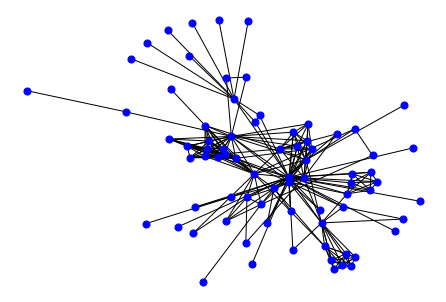

In [31]:
G = get_graph_from_data_file('lesmis.txt')

print('Terceiro momento da distribuição do grau: {:.2f}'.format(momment_of_degree_distribution(G, 3)))
print('Quarto momento da distribuição do grau: {:.2f}'.format(momment_of_degree_distribution(G, 4)))


<b>2 - Calcule o coeficiente de complexidade da power grid.</b>

É dado que o coeficiente de complexidade é descrito pela relação abaixo.

$$
C_x = \frac{E[K^2]}{E[K^1]}\\
$$

Esta medida foi implementada na função "complexity_coefficient".

Coeficiente de complexidade da rede powergrid: 3.87


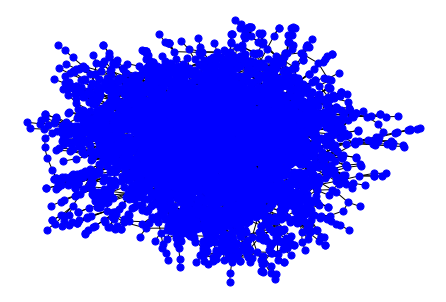

In [32]:
G = get_graph_from_data_file('powergrid.txt')

print('Coeficiente de complexidade da rede powergrid: {:.2f}'.format(complexity_coefficient(G)))


<b>3 - Calcule a entropia de Shannon da rede Euro road.</b>

A entropia de Shannon, dada por 

$$
H = -\sum_{k=0}^{\infty}P(k)logP(K)
$$

é uma medida da previsibilidade de uma medida. Está implementada na função "shannon_entropy".

Entropia de Shannon da rede euroroad: 2.00


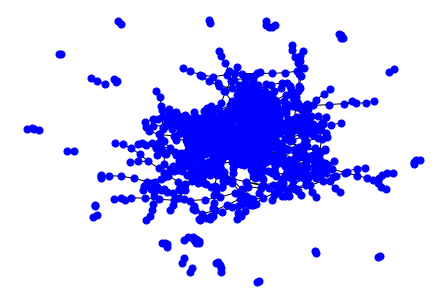

In [33]:
G = get_graph_from_data_file('euroroad.txt')

print('Entropia de Shannon da rede euroroad: {:.2f}'.format(shannon_entropy(G)))


<b>4 - Para a rede de aeroportos dos Estados Unidos, obtenha:</b>

a) transitivity
b) average cluster coefficient

Tais medidas são obtidas com funções da biblioteca NetworkX e estão organizadas na função "get_transitivity_data".

Transitivity da rede usairport: 0.38
Avg. cluster coefficient da rede usairport: 0.50


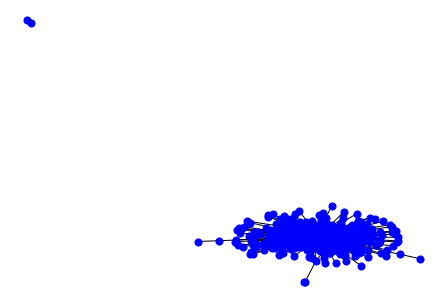

In [34]:
G = get_graph_from_data_file('usairport.txt')

print('Transitivity da rede usairport: {:.2f}'.format(get_transitivity_data(G)[0]))
print('Avg. cluster coefficient da rede usairport: {:.2f}'.format(get_transitivity_data(G)[1]))


<b>5 - Calcule o coeficiente de complexidade e a entropa de Shannon para a rede US Airport.</b>

Coeficiente de complexidade da rede usairport: 112.23
Entropia de Shannon da rede usairport: 4.99


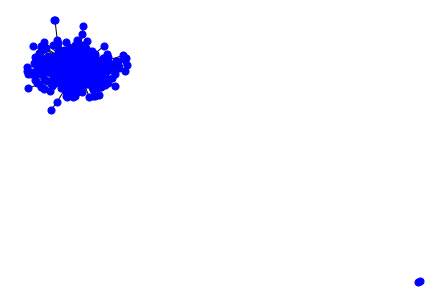

In [35]:
G = get_graph_from_data_file('usairport.txt')

print('Coeficiente de complexidade da rede usairport: {:.2f}'.format(complexity_coefficient(G)))
print('Entropia de Shannon da rede usairport: {:.2f}'.format(shannon_entropy(G)))
